# BAB 2 - DATA UNDERSTANDING



# RINGKASAN
- Data Understanding adalah tahap awal dalam eksplorasi data yang mencakup pemahaman struktur, distribusi, dan kualitas data.

- Terdapat berbagai tipe data berdasarkan sifat, skala pengukuran, bentuk, dan sumbernya.

- Deteksi outlier adalah bagian dari Data Understanding, dan KNN dapat digunakan untuk membantu mendeteksi outlier berbasis jarak atau kepadatan.

- KNN sebagai metode deteksi outlier bisa masuk ke Data Understanding, tetapi jika digunakan untuk prediksi, maka masuk ke tahap Modeling.

- Pemilihan nilai K dalam KNN sangat penting untuk mendapatkan hasil deteksi outlier yang optimal.



# DATA UNDERSTANDING

 1.1 Pengertian Data Understanding
Data Understanding adalah tahao awal dalam proses data mining yang bertujuan untuk memahami karakteristik data sebelm dilakukan analisis lebih lanjut. Pada tahap ini, dilakukan eksplorasi data untuk mengidentfikasi polsa, distribusi, anomali, serta hubungan antar variabel

1.2 Tujuan Data Understanding
- memahami struktur dan distribusi data
- mengetahui kualitas data (misalnya, adanya nilai yang hilang/outlier)
- mengidentifikasi hubungan antar variabel
- menentukan teknik preprocessing yang diperlukan sebelum pemodelan

1.3 Langkah-Langkah Data Understanding
 -  mengumpulkan data awal: mengidentifikasi sumber data dan formatnya (misalnya, database, file CSV, JSON, dll.)
 -  menjelaskan data: mengidentifikasi atribut, tipe data, dan deskripsi data
 -  menjelajahi data: melakukan analisis awal dengan statistik deskriptif dan visulisasi
 -  memverifikasi kualitas data: memeriksa adanya data yang hilang, duplikat/tidak valid
 -  membuat ringkasan data: menyusun laporan awal mengenai karakteristik data
 -  mengidentifikasi masalah dalam data: mencari outlier/nilai yang tidak wajar dalam dataset

# TIPE-TIPE DATA DALAM DATA UNDERSTANDING

2.1 Berdasarkan Sifatnya
- data numerik: data berupa angka yang dapat dihitung/diukur, seperti usia dan pendapatan
- data kategorikal/kualitatif: data yang berupa kategori/label, seperti jenis kelamin/warna mata

2.2 Berdasarkan Skala Pengukuran
- nominal: data dalam bentuk kategori tanpa urutan tertentu (misal: warna, jenis kelamin)
- ordinal: data kategori dengan urutan tetapi jaraknya tidak pasti (misal: tingkat pendidikan, kepuasan pelanggan)
- interval: data numerik dengan jarak tetap anar nilai tetapi tanpa nol absolut (misal: suhu dalam celsius/fahrenheit)
- rasio: data numerik dengan nol absolut yang memungkinakan perbandingan rasio (misal: berat badan, pendapatan)

2.3 Berdasarkan Bentuknya
- data diskrit: data yang hanya memmiliki nilai tertentu (misa: jumlah anak, jumlah mobil)
- data kontinu: data yang bisa memiliki nilai dalam rentang tertenu termasuk pecahan (misal: tinggi badan, waktu perjalanan)

2.4 Berdasarkan Sumbernya
- data primer: daya uang dikumpulkan langsung dari sumbernya (misal: surbei, wawancara, eksperimen)
- data sekunder: data yang diperoleh dari sumber yang sudah ada (misal: laporan, database perusahaan

# DETEKSI OUTLIER MENGGUNAKAN KNN

3.1 Pengertian Outlier

Outlier adalah data yang dimiliki nilai yang jauh berbeda dari mayoritas data lainnya dalam dataset, keberadaan outlier dapat disebabkan oleh kesalahan pengukuran, kesalahan entri data/fenomena unik yang berbeda dari pola umum dalam dataset

3.2 Jenis-Jenis Metrik Jarak dalam KNN

dalam deteksi outlier menggunakan Knn, pemilihan metrik jarak sangat penting karna mempengaruhi bagaimana tetangga terdekat dihitung.

a. Euclidean Distance
- mengukur jarak lurus antara dua titik dalam ruang Euclidean
- cocok untuk data dengan skala yang seragam dan tanpa korelasi antar fitur
- rumus

  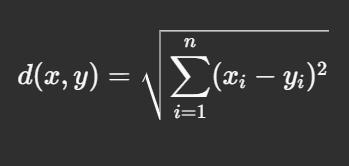

b. Manhattan Distance
- mengukur jarak berdasarkan perbedaan absolut antara koordinat dua titik
- cocok untuk data dengan struktur grid/jika fitur memiliki perbedaan skala yang signifikan
- rumus

  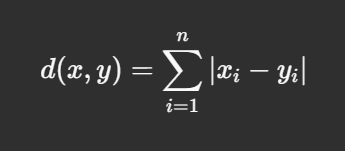

c. Minkowski Disance
- generalisasi dari Euclidean dan Manhattan Distance
- jika p = 2, maka sama dengan Euclidean Distance
- jika p = 1, maka sama dengan Manhattan Distance
- rumus

  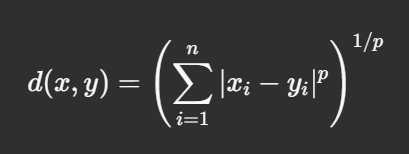

3.3 Metode Deteksi Outlier dengan KNN

K-nearest neighbors (KNN) adalah metode berbasais jarak/kepadatan yang dapat digunakan untuk mendeteksi outlier, terdapat dua pendekatan utama dalam deteksi outlier

a. KNN distance-based outlier detection
- mengukur jarak rata-rata ke K tetangga terdekat
- jika suatu titik memiliki jarak rata-rata yang lebih besar dibandingkan dengan titik lainnya, maka titik tersebut dianggap sebagai outlier
- rumus

  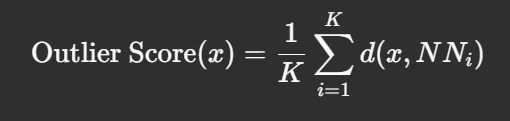

  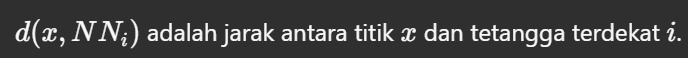

b. KNN density-based outlier detection (local outlier factor - lof)
- berdsasarkan kepadatan relatif suatu titik dibandingkan dengan tetangga nya
- jika kepadatan suatu titik jauh lebih rendah dibandingkan dengan kepadatan tetanggannya, maka titik tersebut dianggp sebgai outlier
- rumus

  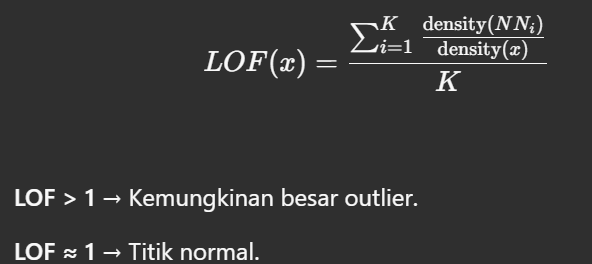




# PRAKTEK

VISUALISASI DATA

1. Install beberapa library yang dibutuhkan

In [ ]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.7 MB/s eta 0:00:00


In [ ]:
!pip install psycopg2-binary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.9 MB/s eta 0:00:00


In [ ]:
!pip install pandas

2. Mengambil database MySql, dari Dbeaver, sebuah alat database (database tool) universal yang digunakan untuk mengelola berbagai jenis database, baik SQL (seperti MySQL, PostgreSQL, SQLite) maupun NoSQL (seperti MongoDB, Cassandra).

In [ ]:
import pymysql
import pandas as pd
from tabulate import tabulate

MYSQL_HOST = "mysql-3d9be5d4-irismysqll.g.aivencloud.com"
MYSQL_PORT = 28758  # Aiven MySQL biasanya menggunakan port 25060
MYSQL_DB = "defaultdb"  # Ganti dengan nama database Anda
MYSQL_USER = "avnadmin"  # Username dari Aiven.io
MYSQL_PASS = "AVNS_9SRQX7luHCPCP1wxyhh"  # Ganti dengan password dari Aiven.io

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=MYSQL_HOST,
        port=MYSQL_PORT,
        user=MYSQL_USER,
        password=MYSQL_PASS,
        database=MYSQL_DB,
        ssl={'ssl': {}},  # Aiven.io membutuhkan koneksi SSL
    )
    cur = conn.cursor()

    # Menjalankan query (Ganti 'your_table' dengan nama tabel yang benar)
    cur.execute("SELECT * FROM defaultdb.irissql;")
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()

+-----+------+-----------------+----------------+---------------+
|     |   id | Class           |   petal length |   petal width |
|-----+------+-----------------+----------------+---------------|
|   0 |    1 | Iris-setosa     |           86.4 |          70   |
|   1 |    2 | Iris-setosa     |            1.4 |           0.2 |
|   2 |    3 | Iris-setosa     |            1.3 |           0.2 |
|   3 |    4 | Iris-setosa     |            1.5 |           0.2 |
|   4 |    5 | Iris-setosa     |            1.4 |           0.2 |
|   5 |    6 | Iris-setosa     |            1.7 |           0.4 |
|   6 |    7 | Iris-setosa     |            1.4 |           0.3 |
|   7 |    8 | Iris-setosa     |            1.5 |           0.2 |
|   8 |    9 | Iris-setosa     |            1.4 |           0.2 |
|   9 |   10 | Iris-setosa     |            1.5 |           0.1 |
|  10 |   11 | Iris-setosa     |            1.5 |           0.2 |
|  11 |   12 | Iris-setosa     |            1.6 |           0.2 |
|  12 |   

3. Mengambil database postgresql dari Dbeaver, sebuah alat database (database tool) universal yang digunakan untuk mengelola berbagai jenis database, baik SQL (seperti MySQL, PostgreSQL, SQLite) maupun NoSQL (seperti MongoDB, Cassandra).

In [ ]:
import psycopg2
import pandas as pd
from tabulate import tabulate

PG_HOST = "pg-ee5fcb6-irisposgresqll.g.aivencloud.com"
PG_PORT = "13492"
PG_NAME = "defaultdb"
PG_USER = "avnadmin"
PG_PASS = "AVNS_82XRmz2cSUlzQs353EZ"

try:
    conn = psycopg2.connect(
        host=PG_HOST,
        port=PG_PORT,
        dbname=PG_NAME,
        user=PG_USER,
        password=PG_PASS,
        sslmode="require"
    )
    cur = conn.cursor()

    # Menjalankan query
    cur.execute("SELECT * FROM irispostgresql.newtable;")  # Ganti dengan nama skema & tabel yang benar
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()

+-----+------+-----------------+----------------+---------------+-----------------+--------------+
|     |   id | Class           |   sepal length |   sepal width |   outlier_score | is_outlier   |
|-----+------+-----------------+----------------+---------------+-----------------+--------------|
|   0 |    2 | Iris-setosa     |            4.9 |           3   |        0.173205 | False        |
|   1 |   11 | Iris-setosa     |            5.4 |           3.7 |        0.331662 | False        |
|   2 |   12 | Iris-setosa     |            4.8 |           3.4 |        0.3      | False        |
|   3 |   13 | Iris-setosa     |            4.8 |           3   |        0.173205 | False        |
|   4 |   14 | Iris-setosa     |            4.3 |           3   |        0.479583 | False        |
|   5 |   15 | Iris-setosa     |            5.8 |           4   |        0.556776 | False        |
|   6 |   16 | Iris-setosa     |            5.7 |           4.4 |        0.616441 | False        |
|   7 |   

4. Gabungkan kedua database Mysql dan Postgresql, untuk jadi satu

In [ ]:
import psycopg2
import pymysql
import pandas as pd
from tabulate import tabulate

DB_HOST = "mysql-3d9be5d4-irismysqll.g.aivencloud.com"
DB_PORT = 28758
DB_NAME = "defaultdb"
DB_USER = "avnadmin"
DB_PASS = "AVNS_9SRQX7luHCPCP1wxyhh"

PG_HOST = "pg-ee5fcb6-irisposgresqll.g.aivencloud.com"
PG_PORT = 13492
PG_NAME = "defaultdb"
PG_USER = "avnadmin"
PG_PASS = "AVNS_82XRmz2cSUlzQs353EZ"

try:
    conn = psycopg2.connect(
        host=PG_HOST, port=PG_PORT, dbname=PG_NAME,
        user=PG_USER, password=PG_PASS, sslmode="require"
    )
    cur = conn.cursor()

    cur.execute("SELECT * FROM irispostgresql.newtable;")
    pg_rows = cur.fetchall()
    pg_columns = [desc[0] for desc in cur.description]
    pg_df = pd.DataFrame(pg_rows, columns=pg_columns)

    mysql_conn = pymysql.connect(
        host=DB_HOST, port=DB_PORT, user=DB_USER,
        password=DB_PASS, database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor
    )
    mysql_cur = mysql_conn.cursor()

    mysql_cur.execute("SELECT * FROM defaultdb.irissql;")
    mysql_rows = mysql_cur.fetchall()
    mysql_df = pd.DataFrame(mysql_rows)

    pg_df = pg_df[["id", "Class", "sepal length", "sepal width"]]
    mysql_df = mysql_df[["id", "petal length", "petal width"]]

    combined_df = pd.merge(pg_df, mysql_df, on="id", how="inner")

    ordered_columns = ["id", "Class", "sepal length", "sepal width", "petal length", "petal width"]
    combined_df = combined_df[ordered_columns]

    df_selected = pd.concat([
        combined_df.head(3),
        pd.DataFrame([["..."] * len(combined_df.columns)], columns=combined_df.columns),
        combined_df.tail(3)
    ])

    print(tabulate(df_selected, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    if cur:
        cur.close()
    if conn:
        conn.close()
    if mysql_cur:
        mysql_cur.close()
    if mysql_conn:
        mysql_conn.close()

+------+----------------+----------------+---------------+----------------+---------------+
| id   | Class          | sepal length   | sepal width   | petal length   | petal width   |
|------+----------------+----------------+---------------+----------------+---------------|
| 2    | Iris-setosa    | 4.9            | 3.0           | 1.4            | 0.2           |
| 11   | Iris-setosa    | 5.4            | 3.7           | 1.5            | 0.2           |
| 12   | Iris-setosa    | 4.8            | 3.4           | 1.6            | 0.2           |
| ...  | ...            | ...            | ...           | ...            | ...           |
| 149  | Iris-virginica | 6.2            | 3.4           | 5.4            | 2.3           |
| 150  | Iris-virginica | 5.9            | 3.0           | 5.1            | 1.8           |
| 1    | Iris-setosa    | 20.1           | 30.5          | 86.4           | 70.0          |
+------+----------------+----------------+---------------+----------------+-----

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

X = combined_df[["sepal length", "sepal width", "petal length", "petal width"]]

K = 3
nbrs = NearestNeighbors(n_neighbors=K, metric='euclidean')
nbrs.fit(X)

distances, _ = nbrs.kneighbors(X)

combined_df["outlier_score"] = distances[:, -1]

outlier_threshold = combined_df.loc[combined_df["id"] == 1, "outlier_score"].values[0]

combined_df["is_outlier"] = combined_df["outlier_score"] >= outlier_threshold

print("\n=== Data dengan Outlier ===")
print(tabulate(combined_df[combined_df["is_outlier"] == True], headers="keys", tablefmt="psql", showindex=False))



=== Data dengan Outlier ===
+------+-------------+----------------+---------------+----------------+---------------+-----------------+--------------+
|   id | Class       |   sepal length |   sepal width |   petal length |   petal width |   outlier_score | is_outlier   |
|------+-------------+----------------+---------------+----------------+---------------+-----------------+--------------|
|    1 | Iris-setosa |           20.1 |          30.5 |           86.4 |            70 |         108.792 | True         |
+------+-------------+----------------+---------------+----------------+---------------+-----------------+--------------+


In [ ]:
import numpy as np

np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

y_pred = clf.fit_predict(combined_df[["sepal length", "sepal width", "petal length", "petal width"]])

ground_truth = combined_df["Class"].map({'Iris-setosa': 1, 'Iris-versicolor': 1, 'Iris-virginica': 1}).fillna(-1).astype(int).values

ground_truth = ground_truth[:len(y_pred)]

n_errors = (y_pred != ground_truth).sum()

X_scores = clf.negative_outlier_factor_

outlier_index = np.where(y_pred == -1)
outlier_scores = X_scores[outlier_index]

print("data yang diduga outlier")
print(y_pred)
data = list(enumerate(y_pred))
print(tabulate(data, headers=["index", "y_pred"], tablefmt="grid"))
print(f"jumlah total data:{len(combined_df)}")

data yang diduga outlier
[ 1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1
  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1
  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1]
+---------+----------+
|   index |   y_pred |
+=========+==========+
|       0 |        1 |
+---------+----------+
|       1 |        1 |
+---------+----------+
|       2 |        1 |
+---------+----------+
|       3 |        1 |
+---------+----------+
|       4 |        1 |
+---------+----------+
|       5 |       -1 |
+---------+----------+
|       6 |       -1 |
+---------+----------+
|       7 |        1 |
+---------+----------+
|       8 |        1 |
+---------+----------+
|       9 |        1 |
+---------+

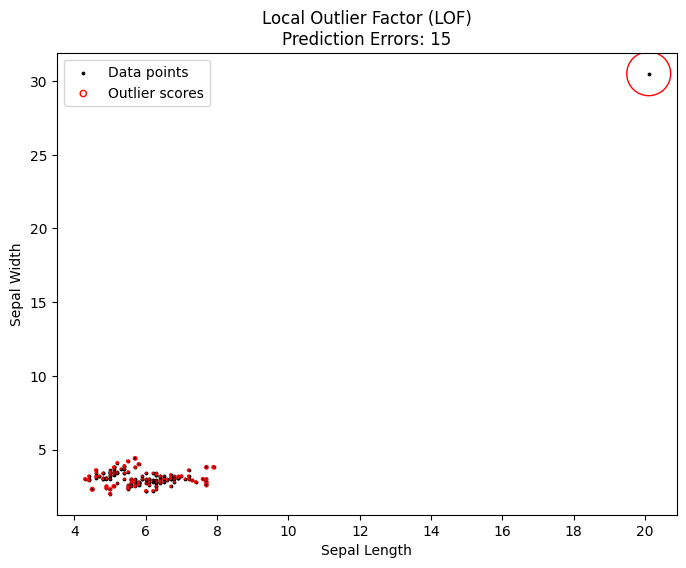

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection
from sklearn.neighbors import LocalOutlierFactor

# Asumsi: combined_df sudah didefinisikan sebelumnya
X = combined_df[["sepal length", "sepal width", "petal length", "petal width"]].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_

# Menyesuaikan ground truth dengan asumsi bahwa semua kelas adalah inlier (+1)
ground_truth = combined_df["Class"].map({'Iris-setosa': 1, 'Iris-versicolor': 1, 'Iris-virginica': 1}).fillna(-1).astype(int).values
ground_truth = ground_truth[:len(y_pred)]

# Hitung jumlah kesalahan prediksi
n_errors = (y_pred != ground_truth).sum()

# Menentukan ukuran radius untuk plotting outlier
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

# Fungsi untuk memperbarui ukuran marker legend
def update_legend_marker_size(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([20])

# Plot data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")  # Titik data biasa
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores"
)

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title(f"Local Outlier Factor (LOF)\nPrediction Errors: {n_errors}")
plt.legend(handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)})
plt.show()


5. Menghitung nilai pada setiap kolom/statistik deskriptoif data

In [ ]:
import pandas as pd
from tabulate import tabulate

selected_columns = combined_df[['sepal length', 'sepal width', 'petal length', 'petal width']]

summary = selected_columns.agg(['mean', lambda x: x.mode().iloc[0], 'median', 'std', 'min', 'max'])

summary.index = summary.index.to_series().replace('<lambda>', 'modus')

print(tabulate(summary, headers='keys', tablefmt='pretty'))


+--------+--------------------+-------------------+-------------------+--------------------+
|        |    sepal length    |    sepal width    |   petal length    |    petal width     |
+--------+--------------------+-------------------+-------------------+--------------------+
|  mean  | 5.943333333333333  |       3.234       | 4.325333333333333 | 1.6640000000000001 |
| modus  |        5.0         |        3.0        |        1.5        |        0.2         |
| median |        5.8         |        3.0        |        4.4        |        1.3         |
|  std   | 1.4268949095059695 | 2.282463934159367 | 6.970563096920018 |  5.66806999336321  |
|  min   |        4.3         |        2.0        |        1.0        |        0.1         |
|  max   |        20.1        |       30.5        |       86.4        |        70.0        |
+--------+--------------------+-------------------+-------------------+--------------------+


6. Visualisasi data

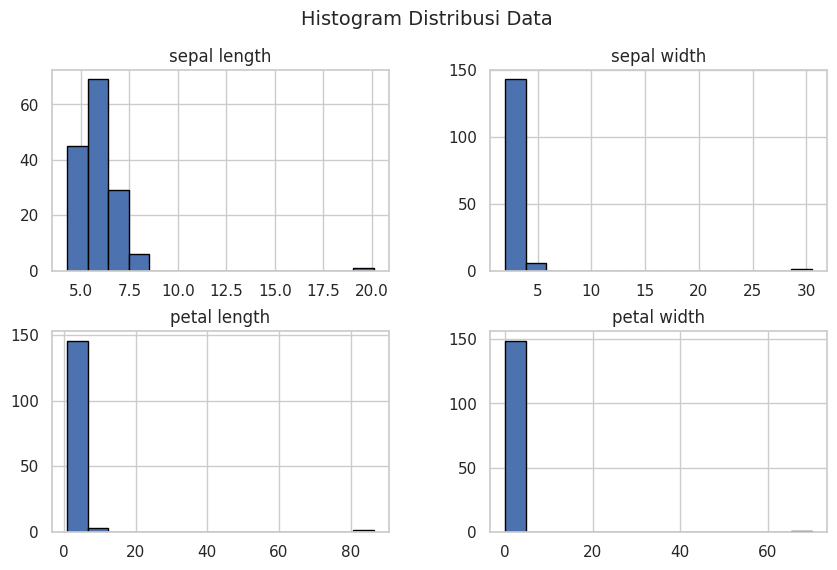

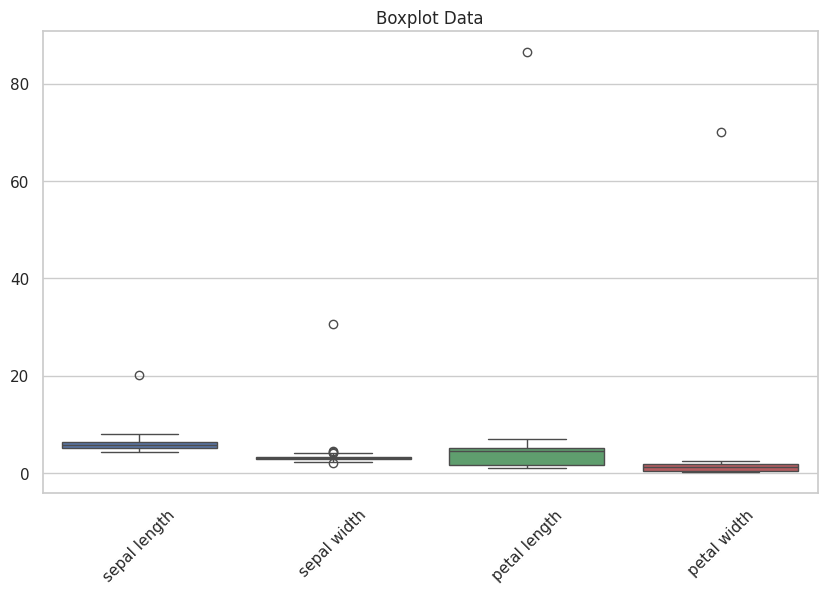

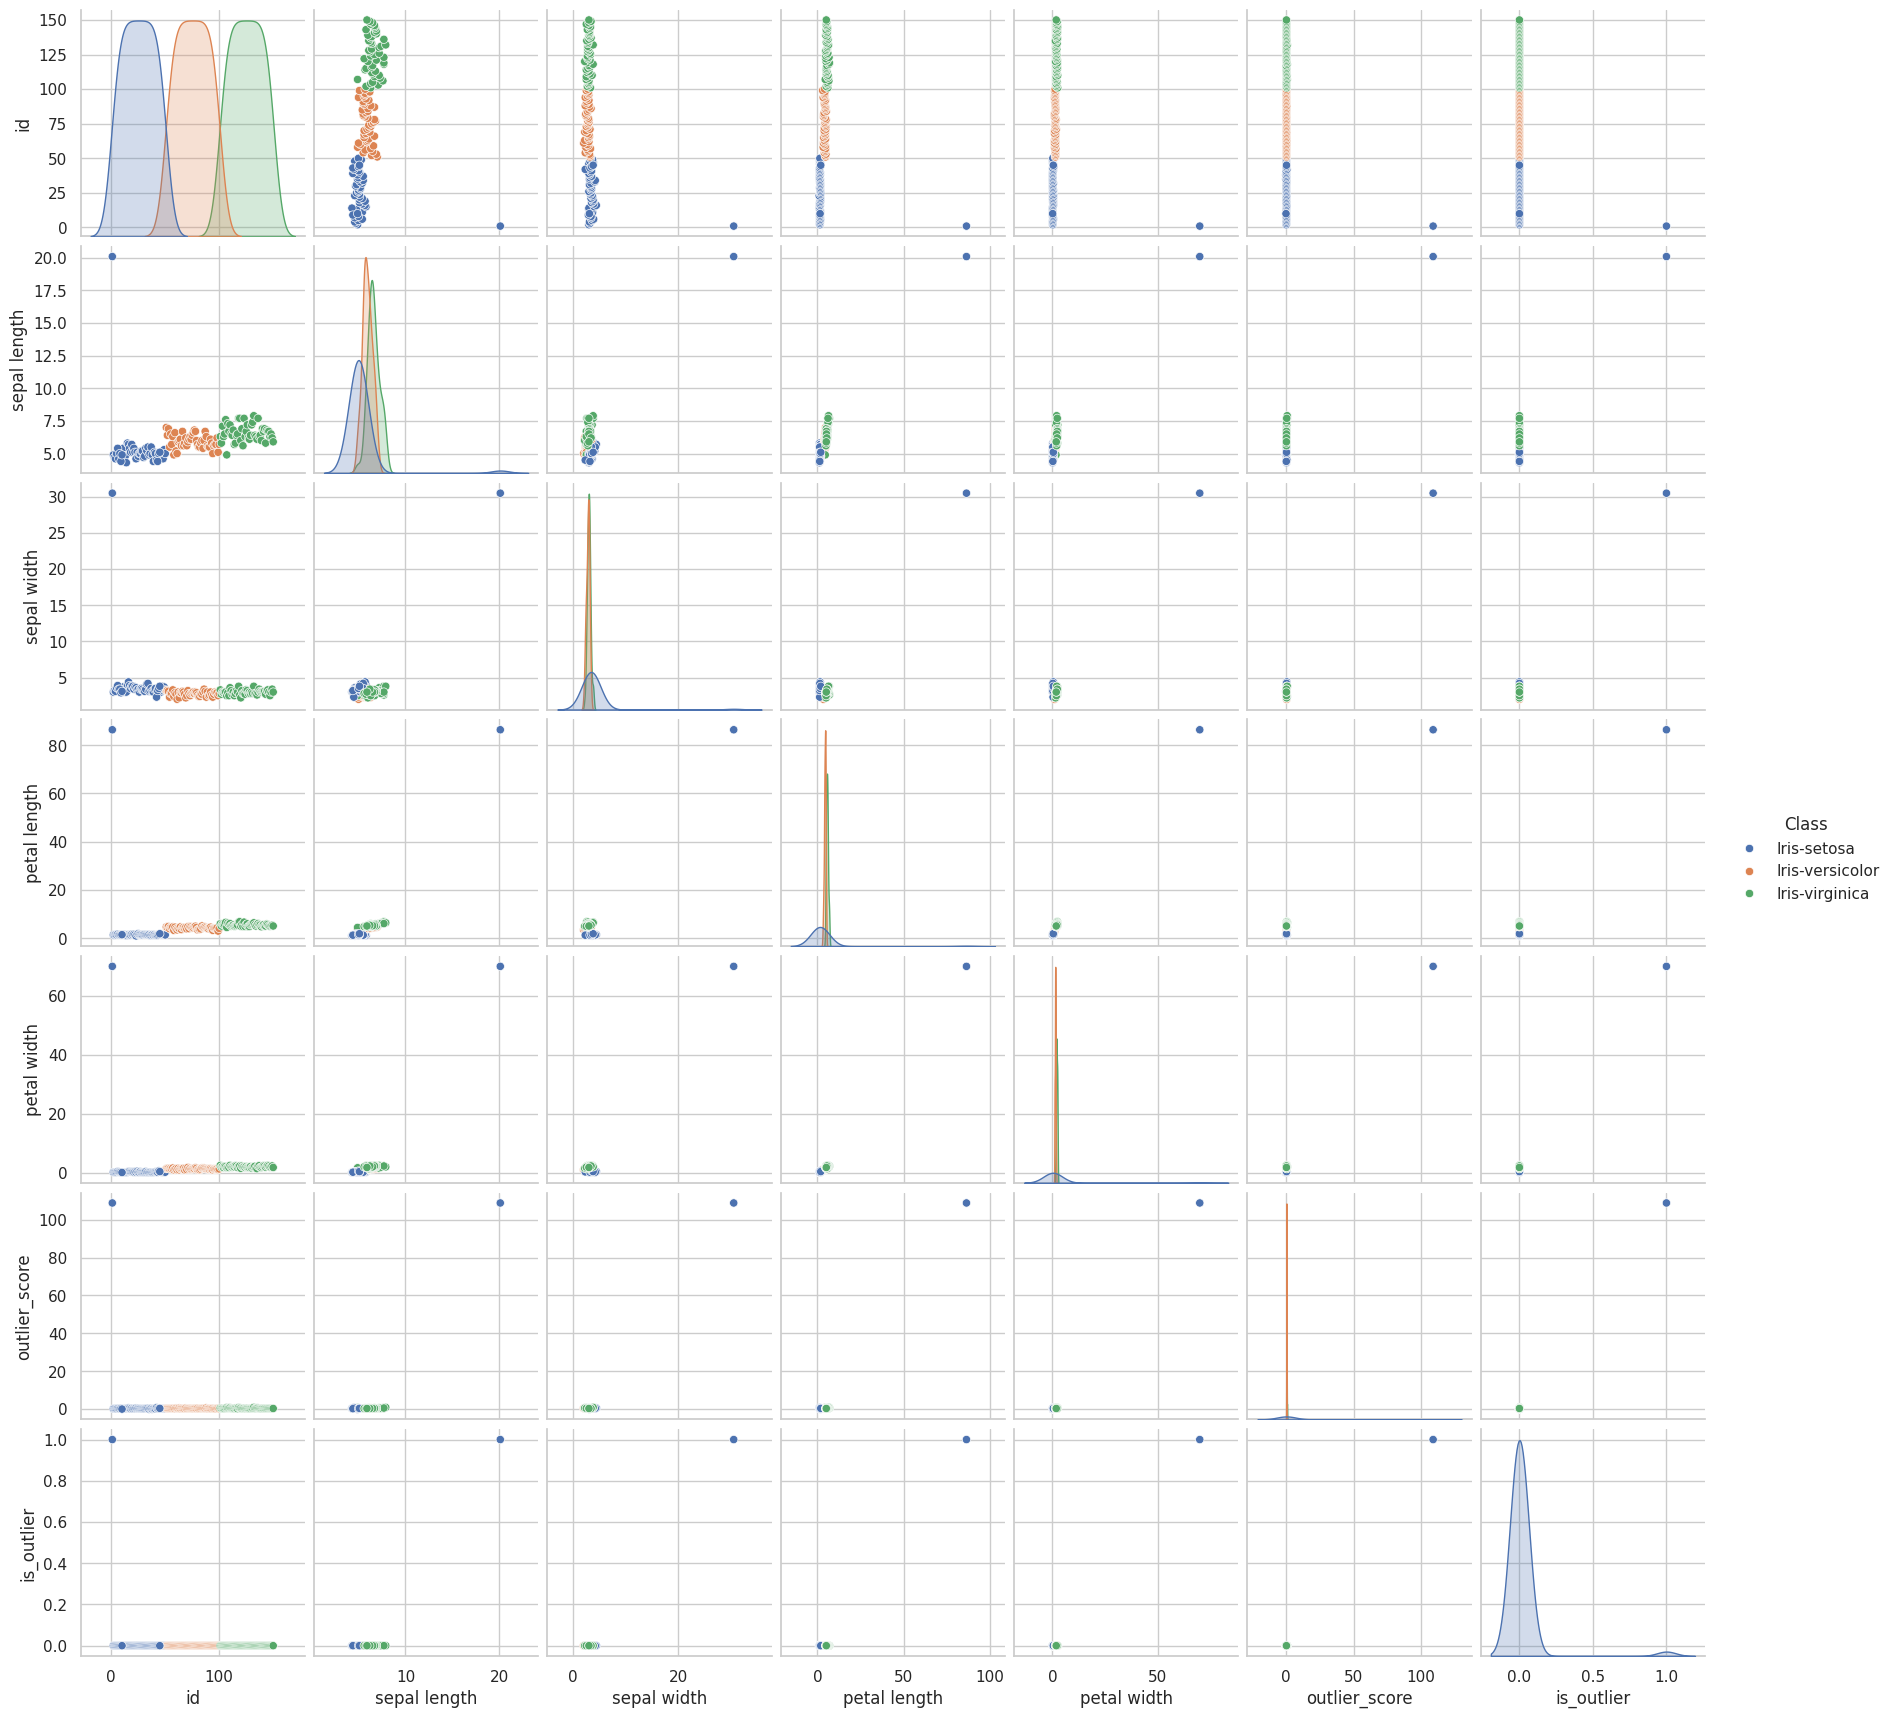

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

selected_columns.hist(figsize=(10, 6), bins=15, edgecolor='black')
plt.suptitle("Histogram Distribusi Data", fontsize=14)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=selected_columns)
plt.title("Boxplot Data")
plt.xticks(rotation=45)
plt.show()

sns.pairplot(combined_df, hue="Class", diag_kind="kde")
plt.show()


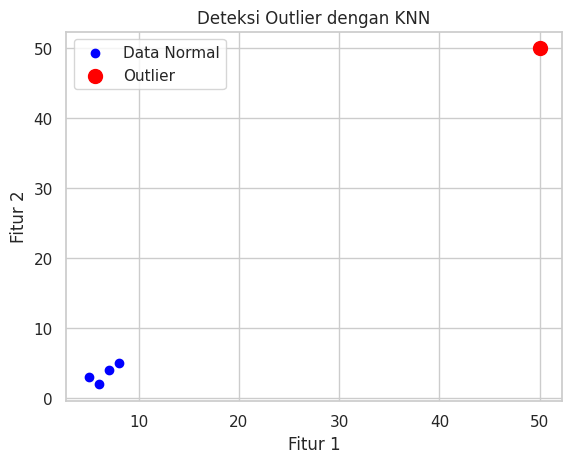

Skor Outlier untuk masing-masing titik: [ 1.41421356  1.41421356  1.41421356  1.41421356 61.55485359]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Contoh dataset dengan outlier
data = np.array([[5, 3], [6, 2], [7, 4], [8, 5], [50, 50]])  # Titik (50,50) adalah outlier

# Model KNN untuk mencari tetangga terdekat
K = 2
nbrs = NearestNeighbors(n_neighbors=K)
nbrs.fit(data)

# Hitung jarak ke K tetangga terdekat
distances, indices = nbrs.kneighbors(data)

# Ambil jarak maksimum ke tetangga terdekat
outlier_scores = distances[:, -1]

# Plot data
plt.scatter(data[:, 0], data[:, 1], c='blue', label="Data Normal")
plt.scatter(data[np.argmax(outlier_scores), 0], data[np.argmax(outlier_scores), 1], c='red', label="Outlier", s=100)
plt.legend()
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.title("Deteksi Outlier dengan KNN")
plt.show()

# Menampilkan skor outlier
print("Skor Outlier untuk masing-masing titik:", outlier_scores)


In [ ]:
import psycopg2
import pymysql
import pandas as pd
import numpy as np
from tabulate import tabulate
from sklearn.neighbors import NearestNeighbors

# Koneksi Database
DB_HOST = "mysql-3d9be5d4-irismysqll.g.aivencloud.com"
DB_PORT = 28758
DB_NAME = "defaultdb"
DB_USER = "avnadmin"
DB_PASS = "AVNS_9SRQX7luHCPCP1wxyhh"

PG_HOST = "pg-ee5fcb6-irisposgresqll.g.aivencloud.com"
PG_PORT = 13492
PG_NAME = "defaultdb"
PG_USER = "avnadmin"
PG_PASS = "AVNS_82XRmz2cSUlzQs353EZ"

try:
    # Koneksi ke PostgreSQL
    conn = psycopg2.connect(
        host=PG_HOST, port=PG_PORT, dbname=PG_NAME,
        user=PG_USER, password=PG_PASS, sslmode="require"
    )
    cur = conn.cursor()

    # Ambil data dari PostgreSQL
    cur.execute("SELECT * FROM irispostgresql.newtable;")
    pg_rows = cur.fetchall()
    pg_columns = [desc[0] for desc in cur.description]
    pg_df = pd.DataFrame(pg_rows, columns=pg_columns)

    # Koneksi ke MySQL
    mysql_conn = pymysql.connect(
        host=DB_HOST, port=DB_PORT, user=DB_USER,
        password=DB_PASS, database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor
    )
    mysql_cur = mysql_conn.cursor()

    # Ambil data dari MySQL
    mysql_cur.execute("SELECT * FROM defaultdb.irissql;")
    mysql_rows = mysql_cur.fetchall()
    mysql_df = pd.DataFrame(mysql_rows)

    # Pilih fitur yang diperlukan
    pg_df = pg_df[["id", "Class", "sepal length", "sepal width"]]
    mysql_df = mysql_df[["id", "petal length", "petal width"]]

    # Gabungkan dataset berdasarkan id
    combined_df = pd.merge(pg_df, mysql_df, on="id", how="inner")

    # Urutkan kolom agar rapi
    ordered_columns = ["id", "Class", "sepal length", "sepal width", "petal length", "petal width"]
    combined_df = combined_df[ordered_columns]

    # Ambil fitur numerik untuk analisis outlier
    feature_cols = ["sepal length", "sepal width", "petal length", "petal width"]
    X = combined_df[feature_cols]

    # Model KNN untuk deteksi outlier
    K = 5  # Bisa disesuaikan
    nbrs = NearestNeighbors(n_neighbors=K, metric='euclidean')
    nbrs.fit(X)

    # Hitung jarak ke K tetangga terdekat
    distances, indices = nbrs.kneighbors(X)

    # Gunakan rata-rata jarak ke K tetangga sebagai skor outlier
    combined_df["outlier_score"] = distances[:, -1]

    # Tetapkan threshold untuk mendeteksi outlier (misalnya 95% dari nilai terbesar)
    threshold = np.percentile(combined_df["outlier_score"], 95)
    combined_df["is_outlier"] = combined_df["outlier_score"] > threshold

    # Simpan hasil deteksi outlier ke database PostgreSQL
    cur.execute("ALTER TABLE irispostgresql.newtable ADD COLUMN IF NOT EXISTS outlier_score FLOAT;")
    cur.execute("ALTER TABLE irispostgresql.newtable ADD COLUMN IF NOT EXISTS is_outlier BOOLEAN;")
    conn.commit()

    for index, row in combined_df.iterrows():
        cur.execute(
            "UPDATE irispostgresql.newtable SET outlier_score = %s, is_outlier = %s WHERE id = %s;",
            (row["outlier_score"], row["is_outlier"], row["id"])
        )
    conn.commit()

    # Tampilkan hasil deteksi outlier
    print("\n=== Data dengan Outlier ===")
    print(tabulate(combined_df.sort_values(by="outlier_score", ascending=False).head(10), headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    if cur:
        cur.close()
    if conn:
        conn.close()
    if mysql_cur:
        mysql_cur.close()
    if mysql_conn:
        mysql_conn.close()



=== Data dengan Outlier ===
+------+-----------------+----------------+---------------+----------------+---------------+-----------------+--------------+
|   id | Class           |   sepal length |   sepal width |   petal length |   petal width |   outlier_score | is_outlier   |
|------+-----------------+----------------+---------------+----------------+---------------+-----------------+--------------|
|    1 | Iris-setosa     |           20.1 |          30.5 |           86.4 |          70   |      109.046    | True         |
|  118 | Iris-virginica  |            7.7 |           3.8 |            6.7 |           2.2 |        1.00499  | True         |
|  132 | Iris-virginica  |            7.9 |           3.8 |            6.4 |           2   |        0.932738 | True         |
|  119 | Iris-virginica  |            7.7 |           2.6 |            6.9 |           2.3 |        0.927362 | True         |
|  107 | Iris-virginica  |            4.9 |           2.5 |            4.5 |           1.

# Deteksi Outlier Menggunakan Metode LOF

1. Tanpa Library

In [13]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean

def calculate_lof_manual(data, k=3):
    n = len(data)
    distances = np.zeros((n, n))

    # Hitung jarak Euclidean antar setiap titik
    for i in range(n):
        for j in range(n):
            distances[i, j] = euclidean(data[i], data[j])

    df_distances = pd.DataFrame(distances, index=labels, columns=labels).round(2)
    print("\nJarak Euclidean antar titik:")
    print(df_distances)

    # Tentukan k-tetangga terdekat untuk setiap titik
    neighbors = np.argsort(distances, axis=1)[:, 1:k+1]

    df_neighbors = pd.DataFrame({
        "Titik": labels,
        "Tetangga Terdekat": [[labels[n] for n in neighbors[i]] for i in range(n)]
    })
    print("\nK-tetangga terdekat:")
    print(df_neighbors.to_string(index=False))

    # Hitung reachability distance (RD)
    rd = np.zeros((n, k))
    for i in range(n):
        for j in range(k):
            rd[i, j] = max(distances[i, neighbors[i, j]], distances[neighbors[i, j], neighbors[i, j]])

    df_rd = pd.DataFrame({
        "Titik": labels,
        "RD": [rd[i].mean().round(2) for i in range(n)]
    })
    print("\nReachability Distance (RD):")
    print(df_rd.to_string(index=False))

    # Hitung Local Reachability Density (LRD)
    lrd = np.zeros(n)
    for i in range(n):
        lrd[i] = k / np.sum(rd[i])

    df_lrd = pd.DataFrame({
        "Titik": labels,
        "LRD": lrd.round(4)
    })
    print("\nLocal Reachability Density (LRD):")
    print(df_lrd.to_string(index=False))

    # Hitung LOF untuk setiap titik
    lof_scores = np.zeros(n)
    for i in range(n):
        lof_scores[i] = np.mean([lrd[neighbor] for neighbor in neighbors[i]]) / lrd[i]

    df_lof = pd.DataFrame({
        "Titik": labels,
        "LOF Score (Manual)": lof_scores.round(4)
    })
    print("\nLocal Outlier Factor (LOF):")
    print(df_lof.to_string(index=False))

    return distances, neighbors, rd, lrd, lof_scores

# Contoh Data 10 sampel dengan 2 fitur, dengan satu outlier
data = np.array([
    [2, 3], [3, 5], [5, 8], [8, 8], [9, 11],
    [10, 13], [12, 15], [15, 18], [30, 30], [100, 100]  # Outlier
])

# Nama titik untuk mempermudah interpretasi
labels = list("KLMNOPQRST")

# Hitung LOF secara manual
distances, neighbors, rd, lrd, lof_manual = calculate_lof_manual(data, k=3)

# Ringkasan Akhir dalam bentuk tabel
df_summary = pd.DataFrame({
    "Titik": labels,
    "Tetangga Terdekat": [[labels[n] for n in neighbors[i]] for i in range(len(data))],
    "RD": [rd[i].mean().round(2) for i in range(len(data))],
    "LRD": lrd.round(4),
    "LOF Score (Manual)": lof_manual.round(4)
})

print("\nRingkasan Akhir dalam bentuk tabel:")
print(df_summary.to_string(index=False))


Jarak Euclidean antar titik:
        K       L       M       N       O       P       Q       R      S  \
K    0.00    2.24    5.83    7.81   10.63   12.81   15.62   19.85  38.90   
L    2.24    0.00    3.61    5.83    8.49   10.63   13.45   17.69  36.80   
M    5.83    3.61    0.00    3.00    5.00    7.07    9.90   14.14  33.30   
N    7.81    5.83    3.00    0.00    3.16    5.39    8.06   12.21  31.11   
O   10.63    8.49    5.00    3.16    0.00    2.24    5.00    9.22  28.32   
P   12.81   10.63    7.07    5.39    2.24    0.00    2.83    7.07  26.25   
Q   15.62   13.45    9.90    8.06    5.00    2.83    0.00    4.24  23.43   
R   19.85   17.69   14.14   12.21    9.22    7.07    4.24    0.00  19.21   
S   38.90   36.80   33.30   31.11   28.32   26.25   23.43   19.21   0.00   
T  137.89  135.77  132.25  130.11  127.29  125.18  122.35  118.11  98.99   

        T  
K  137.89  
L  135.77  
M  132.25  
N  130.11  
O  127.29  
P  125.18  
Q  122.35  
R  118.11  
S   98.99  
T    0.00  



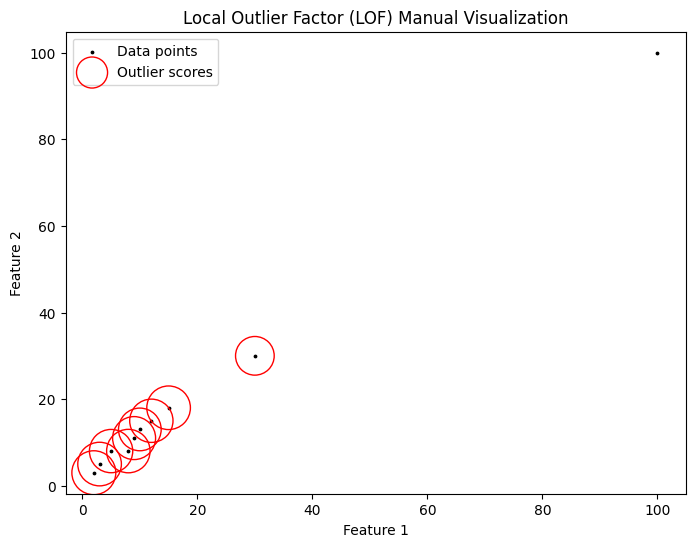

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_lof(data, lof_scores):
    # Menentukan ukuran radius untuk plotting berdasarkan LOF score
    radius = (lof_scores.max() - lof_scores) / (lof_scores.max() - lof_scores.min())

    # Plot data
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], color="k", s=3.0, label="Data points")  # Titik data biasa
    scatter = plt.scatter(
        data[:, 0],
        data[:, 1],
        s=1000 * radius,  # Ukuran titik berdasarkan LOF score
        edgecolors="r",
        facecolors="none",
        label="Outlier scores"
    )

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Local Outlier Factor (LOF) Manual Visualization")
    plt.legend()
    plt.show()

# Contoh data (10 sampel dengan 2 fitur, termasuk outlier)
data = np.array([
    [2, 3], [3, 5], [5, 8], [8, 8], [9, 11],
    [10, 13], [12, 15], [15, 18], [30, 30], [100, 100]  # Outlier
])

# Contoh LOF Scores yang sudah dihitung sebelumnya (simulasi)
lof_scores = np.array([0.9, 1.0, 1.1, 1.05, 1.2, 1.3, 1.1, 1.0, 2.5, 8.0])  # Nilai lebih besar dari 1.5 adalah outlier

# Panggil fungsi visualisasi
visualize_lof(data, lof_scores)


2. pake Library

In [14]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Contoh Data 10 sampel dengan 2 fitur, dengan satu outlier
data = np.array([
    [2, 3], [3, 5], [5, 8], [8, 8], [9, 11],
    [10, 13], [12, 15], [15, 18], [30, 30], [100, 100]  # Outlier
])

# Nama titik untuk mempermudah interpretasi
labels = list("KLMNOPQRST")

# Inisialisasi model LOF dari sklearn
lof_model = LocalOutlierFactor(n_neighbors=3, metric='euclidean')

# Fit model dan hitung LOF
lof_scores = -lof_model.fit_predict(data)  # -1 untuk outlier, 1 untuk inlier
lof_values = -lof_model.negative_outlier_factor_  # Nilai LOF

# Buat DataFrame hasil perhitungan
df_lof = pd.DataFrame({
    "Titik": labels,
    "LOF Score (sklearn)": lof_values.round(4),
    "Outlier Flag": ["Outlier" if score > 1.5 else "Inlier" for score in lof_values]
})

print(df_lof.to_string(index=False))


Titik  LOF Score (sklearn) Outlier Flag
    K               1.1703       Inlier
    L               1.1062       Inlier
    M               0.9841       Inlier
    N               0.9748       Inlier
    O               1.0075       Inlier
    P               0.9201       Inlier
    Q               1.1461       Inlier
    R               1.2733       Inlier
    S               3.7424      Outlier
    T              12.7286      Outlier


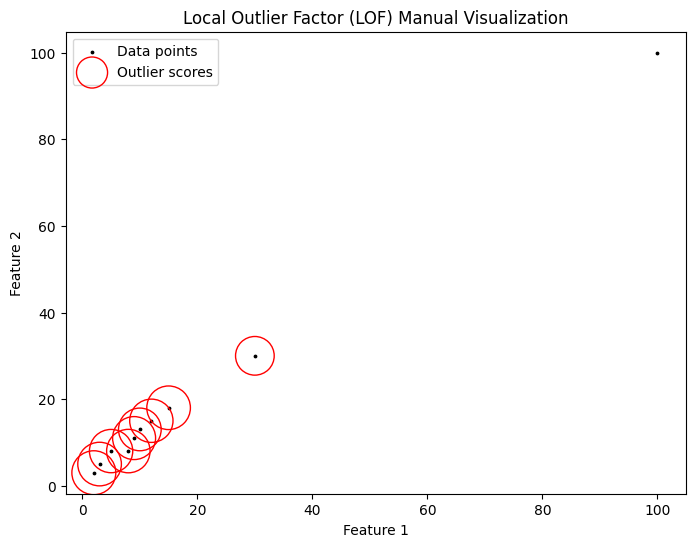

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_lof(data, lof_scores):
    # Menentukan ukuran radius untuk plotting berdasarkan LOF score
    radius = (lof_scores.max() - lof_scores) / (lof_scores.max() - lof_scores.min())

    # Plot data
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], color="k", s=3.0, label="Data points")  # Titik data biasa
    scatter = plt.scatter(
        data[:, 0],
        data[:, 1],
        s=1000 * radius,  # Ukuran titik berdasarkan LOF score
        edgecolors="r",
        facecolors="none",
        label="Outlier scores"
    )

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Local Outlier Factor (LOF) Manual Visualization")
    plt.legend()
    plt.show()

# Contoh data (10 sampel dengan 2 fitur, termasuk outlier)
data = np.array([
    [2, 3], [3, 5], [5, 8], [8, 8], [9, 11],
    [10, 13], [12, 15], [15, 18], [30, 30], [100, 100]  # Outlier
])

# Contoh LOF Scores yang sudah dihitung sebelumnya (simulasi)
lof_scores = np.array([0.9, 1.0, 1.1, 1.05, 1.2, 1.3, 1.1, 1.0, 2.5, 8.0])  # Nilai lebih besar dari 1.5 adalah outlier

# Panggil fungsi visualisasi
visualize_lof(data, lof_scores)
